# MultiDiGraph
- most recent code
- multidigraph
- Convert: article.csv to .gml and .net
- Draw: graph


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline  

from glob import glob
fileName = 'article0'

In [2]:
def getFiles(fileName):
    matches = glob('*'+fileName+'*')
    bigFile = matches[0]
    data = pd.DataFrame.from_csv(bigFile)
    return clearSource(data)
    

def clearSource(data):
    columns = ['source','target']
    pre = len(data)
    for column in columns:
        data = data[pd.notnull(data[column])]
    post = len(data)
    print "Filtered %s rows to %s rows by removing rows with blank values in columns %s" % (pre,post,columns)
    return data
    
    
#data = getFiles(fileName)

what does relevant = extra mean?

In [3]:
def getStuff(data,labels):
    forEdges = labels == ['edge']
    columns = list(data.columns.values)
    items = dict()
    
    nameFunc = {True: lambda x,y: '%s - %s - %s' % (x['source'],x['edge'],x['target']),
                False: lambda x,y: x[y]}[forEdges]
    
    extra = ['source','target'] * forEdges
    
    for label in labels:
        relevant = [col for col in columns if label+'-' in col] + extra
        relevant = extra  # what does this mean?
        print "Extracting %s data from %s" % (label,relevant)
        for i in data.index:
            row = data.ix[i]
            for col in relevant:
                if str(row[col]).lower() != 'nan':
                    name = nameFunc(row,label)
                    if name not in items:
                        items[name] = dict()
                    items[name][col.replace(label+'-','')] = row[col]
    return items
    

def getNodes(data):
    return getStuff(data,['source','target'])


def getEdges(data):
    return getStuff(data,['edge'])
      
    
#allNodes = getNodes(data); allEdges = getEdges(data)

In [4]:
def addNodes(graph,nodes):
    for key,value in nodes.iteritems():
        graph.add_node(key,attr_dict=value)
    return graph
    
def addEdges(graph,edges):
    for key,value in edges.iteritems():
        value['label'] = key
        value['edge'] = key.split(' - ')[1]
        graph.add_edge(value['source'],value['target'],attr_dict = value)
    return graph

def createNetwork(edges,nodes):
    graph = nx.MultiDiGraph()
    graph = addNodes(graph,nodes)
    graph = addEdges(graph,edges)
    return graph

#fullGraph = createNetwork(allEdges,allNodes)

In [5]:
def drawIt(graph,what='graph'):
    style=nx.spring_layout(graph)
    size = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what,size)
    if size > 20:
        plt.figure(figsize=(10,10))
        if size > 40:
            nx.draw(graph,style,node_size=60,font_size=8)
        else:
            nx.draw(graph,style)
    else:
        nx.draw(graph,style)
    plt.show()
    

In [6]:
## for multi di graph
def describeGraph(graph):
    params = (graph.number_of_nodes(),graph.number_of_edges())
    print "Graph has %s nodes, %s edges\n" % params
    drawIt(graph)

In [7]:
## connected_components only for undirected graphs

#def describeGraph(graph):
#    components = nx.connected_components(graph)
#    components = list(components)
#    isolated = [entry[0] for entry in components if len(entry)==1]
#    params = (graph.number_of_nodes(),graph.number_of_edges(),len(components),len(isolated))
#    print "Graph has %s nodes, %s edges, %s connected components, and %s isolated nodes\n" % params
#    drawIt(graph)
#    for idx, sub in enumerate (components):
#        drawIt(graph.subgraph(sub),what='component')
#    print "Isolated nodes:", isolated

In [8]:
def getGraph(fileRef):
    data = getFiles(fileName)
    nodes = getNodes(data)
    edges = getEdges(data)
    graph = createNetwork(edges,nodes)
    fileOut = fileRef.split('.')[0]+'.gml'
    print "Writing GML file to %s" % fileOut
    nx.write_gml(graph, fileOut)
    
    fileOutNet = fileRef.split('.')[0]+'.net'
    print "Writing net file to %s" % fileOutNet
    nx.write_pajek(graph, fileOutNet)
    
    describeGraph(graph)
    return graph, nodes, edges


Filtered 147 rows to 147 rows by removing rows with blank values in columns ['source', 'target']
Extracting source data from []
Extracting target data from []
Extracting edge data from ['source', 'target']
Writing GML file to article0.gml
Writing net file to article0.net
Graph has 140 nodes, 147 edges

Drawing graph of size 140:


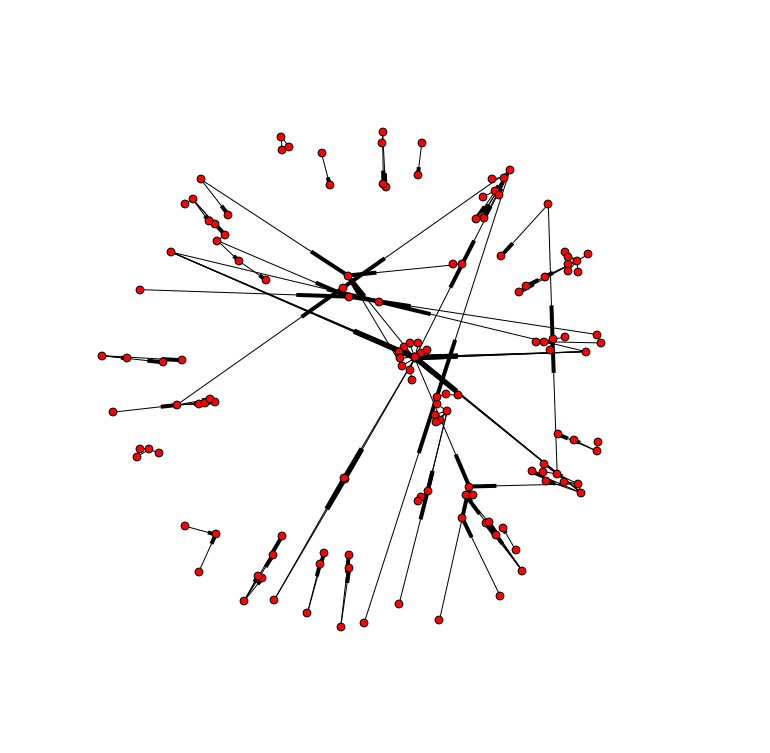

In [9]:
fileName = 'article0'
graph, nodes, edges = getGraph(fileName)

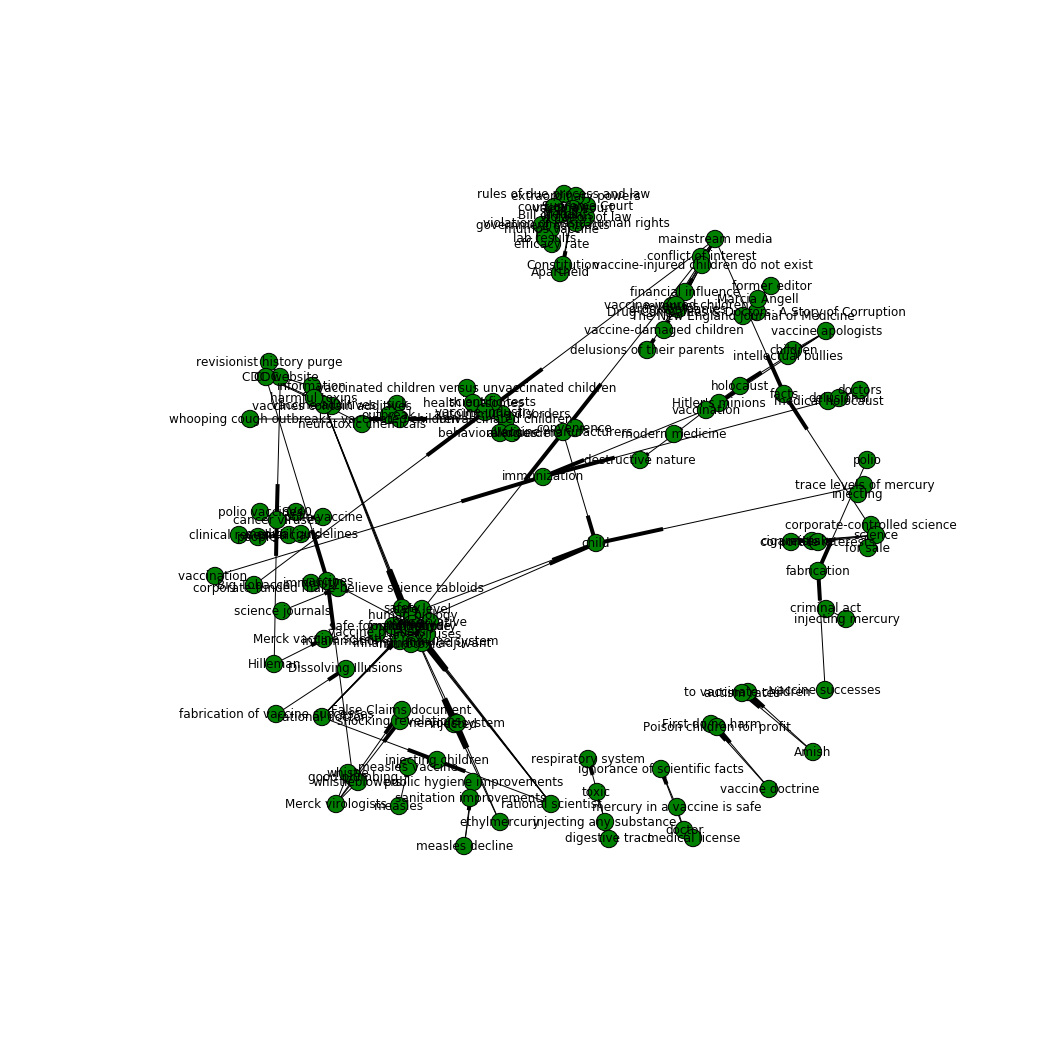

In [10]:
plt.figure(figsize=(14, 14))
nx.draw_spring(graph, node_color = 'g', with_labels=True, arrows=True)
plt.show()